### Treść zadania

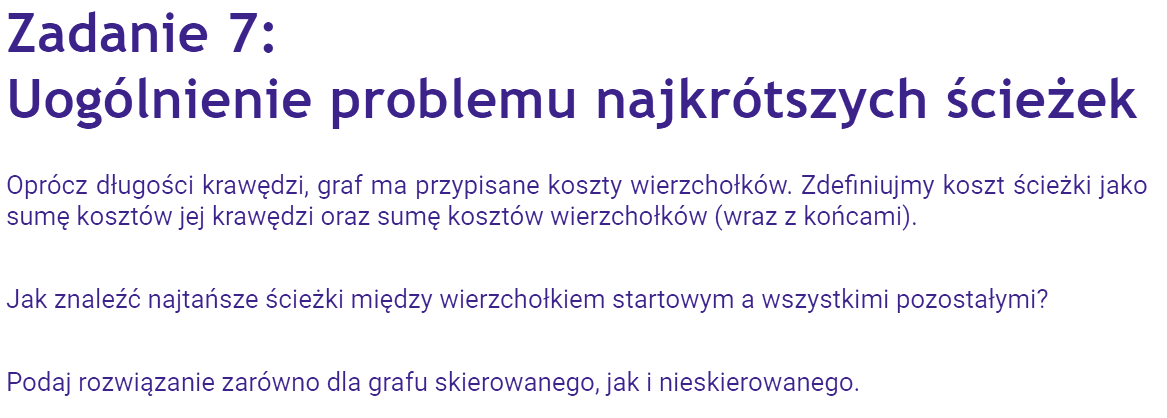

###### UWAGA
W poniższych algorytmach zwracam listę rodziców oraz wag, na podstawie których można odtworzyć długości ścieżek oraz same ścieżki.

# Sposób I
### (Z uwzględnianiem wag wierzchołków podczas dodawania do kolejki priorytetowej)

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V) $  - zakładam, że dany graf na wejściu nie jest wliczany do złożoności pamięciowej

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', W: 'vertices weights', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((W[s], s, None))

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((min_w + weight + W[v], v, u))
                
    return parents, weights

###### Kilka testów

##### Pomocnicze:

In [2]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
    return G


def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

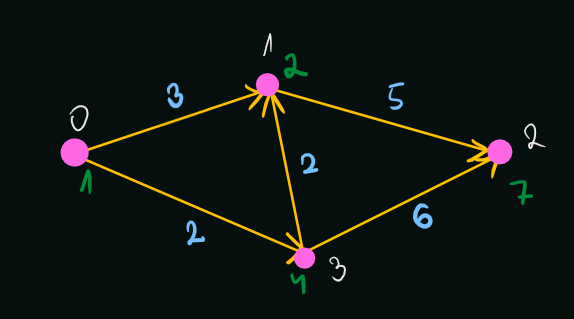

In [3]:
E = [(0, 1, 3), (1, 2, 5), (0, 3, 2), (3, 2, 6), (3, 1, 2)]
W = [1, 2, 7, 4]

G = directed_weighted_graph_list(E)

print(dijkstra(G, W, 0))

([None, 0, 1, 0], [1, 6, 18, 7])


In [4]:
print(dijkstra(G, W, 3))

([None, 3, 3, None], [inf, 8, 17, 4])


In [5]:
G = undirected_weighted_graph_list(E)

print(dijkstra(G, W, 2))

([1, 2, None, 2], [18, 14, 7, 17])


# Sposób II
### (Zbudowanie grafu skierowanego z uwzględnieniem wag wierzchołków)

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V + E) $  - zakładam, że na wejściu otrzymujemy tylko listę krawędzi, a graf trzeba sobie utworzyć

### Implementacja

In [6]:
from queue import PriorityQueue


def create_graph(E: 'array of weighted edges', W: 'array of vertices weights', is_directed=True):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    
    # Create a graph
    G = [[] for _ in range(n)]
    for u, v, weight in E:
        G[u].append((v, weight + W[v]))
        if not is_directed:
            G[v].append((u, weight + W[u]))
            
    return G


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', start_weight):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((start_weight, s, None))

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                pq.put((weights[u] + weight, v, u))
                
    return parents, weights

###### Kilka testów

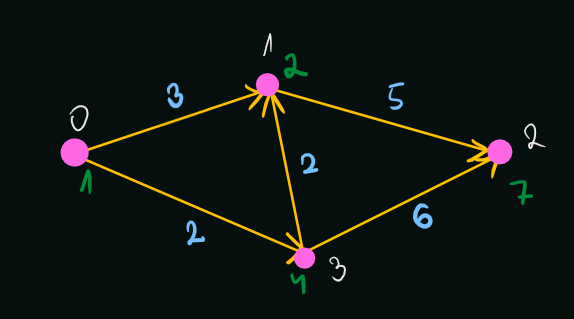

In [7]:
E = [(0, 1, 3), (1, 2, 5), (0, 3, 2), (3, 2, 6), (3, 1, 2)]
W = [1, 2, 7, 4]

G = create_graph(E, W)

s = 0
print(dijkstra(G, s, W[s]))

([None, 0, 1, 0], [1, 6, 18, 7])


In [8]:
s = 3
print(dijkstra(G, s, W[s]))

([None, 3, 3, None], [inf, 8, 17, 4])


In [9]:
G = create_graph(E, W, is_directed=False)

s = 2
print(dijkstra(G, s, W[s]))

([1, 2, None, 2], [18, 14, 7, 17])


In [10]:
G = create_graph(E, W, is_directed=True)

s = 2
print(dijkstra(G, s, W[s]))

([None, None, None, None], [inf, inf, 7, inf])


# Sposób III
### (Z dodaniem po połowie wag wierzchołków do wag krawędzi)

W poniższej implementacji zakładam, że możemy zmodyfikować graf, który otrzymujemy na wejściu. (Można później go łatwo naprawić, co również uczynię)

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V) $  - zakładam, że na wejściu otrzymujemy graf w postaci listy krawędzi

### Implementacja

In [11]:
from queue import PriorityQueue


def map_graph(G: 'graph represented by adjacency lists', W: 'array of vertices weights'):
    n = len(G)
    
    for u in range(n):
        for i in range(len(G[u])):
            v = G[u][i][0]
            G[u][i][1] += (W[u] + W[v]) / 2
            
            
def fix_graph(G: 'graph represented by adjacency lists', W: 'array of vertices weights'):
    n = len(G)
    
    for u in range(n):
        for i in range(len(G[u])):
            v = G[u][i][0]
            G[u][i][1] -= (W[u] + W[v]) / 2
            if G[u][i][1] == int(G[u][i][1]):
                G[u][i][1] = int(G[u][i][1])


def dijkstra(G: 'graph represented by adjacency lists', W: 'vertices weights',  s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s, None))
    
    map_graph(G, W)

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                pq.put((min_w + weight, v, u))
                
    fix_graph(G, W)
    
    # We have to add half of the start and the end vertex weight to each path
    for u in range(n):
        weights[u] += (W[s] + W[u]) / 2
        if weights[u] < inf and weights[u] == int(weights[u]):
            weights[u] = int(weights[u])
        
    return parents, weights

###### Kilka testów

##### Pomocnicze

In [12]:
def directed_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append([e[1], e[2]])
    return G


def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append([e[1], e[2]])
        G[e[1]].append([e[0], e[2]])
    return G

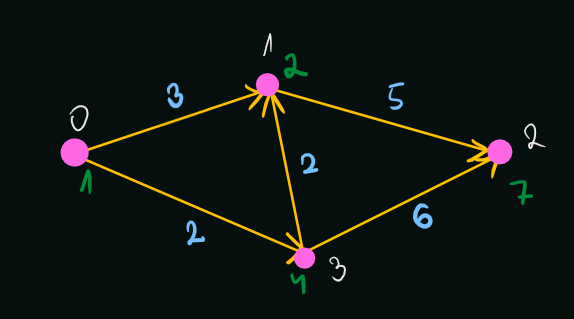

In [13]:
E = [(0, 1, 3), (1, 2, 5), (0, 3, 2), (3, 2, 6), (3, 1, 2)]
W = [1, 2, 7, 4]

G = directed_weighted_graph_list(E)

print(dijkstra(G, W, 0))

([None, 0, 1, 0], [1, 6, 18, 7])


In [14]:
print(dijkstra(G, W, 3))

([None, 3, 3, None], [inf, 8, 17, 4])


In [15]:
G = undirected_weighted_graph_list(E)

print(dijkstra(G, W, 2))

([1, 2, None, 2], [18, 14, 7, 17])
